## 빅데이터 실습

### COVID19, 코로나 바이러스 영향으로 중국인 관광객 수 감소 분석

#### 중간 저장 엑셀파일 로드

In [1]:
# Pandas 등록
import pandas as pd


In [4]:
df_total = pd.read_excel('../day03/data/kto_total.xlsx')
df_total

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아주,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아주,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아주,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아주,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아주,3.3
...,...,...,...,...,...,...,...,...,...,...
7495,대양주 기타,1,0,1,0,3,5,2020-05,오세아니아,0.0
7496,남아프리카공화국,1,0,3,0,25,29,2020-05,아프리카,0.0
7497,아프리카 기타,3,1,3,6,118,131,2020-05,아프리카,0.0
7498,국적미상,1,0,0,0,3,4,2020-05,기타대륙,0.0


In [5]:
condition = df_total['국적'] == '중국'

In [8]:
df_china = df_total[condition]

In [9]:
df_china.reset_index(inplace=True) # 인덱스를 순서대로 정렬

In [10]:
df_china

,index,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아주,10.1
1,77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아주,13.6
2,137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아주,9.2
3,197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아주,15.5
4,257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아주,17.0
...,...,...,...,...,...,...,...,...,...,...,...
120,7217,중국,393336,2813,99,10433,75000,481681,2020-01,아시아주,38.2
121,7277,중국,49520,715,11,20753,33087,104086,2020-02,아시아주,9.8
122,7337,중국,5040,115,2,7388,4050,16595,2020-03,아시아주,16.0
123,7397,중국,522,71,0,1112,2230,3935,2020-04,아시아주,10.2


### 시각화

In [11]:
# 필요 라이브러리, 모듈 등록
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# 한글 깨짐 문제 해결
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/NanumGothicCoding.ttf' # 나눔고딕코딩 사용, 나눔고딕에서 오류발생(!)
font = font_manager.FontProperties(fname=font_path).get_name() # 실제 설치된 폰트 이름조회
rc('font', family=font) # 한글깨짐현상 해결!!
rcParams['axes.unicode_minus'] = False # 한글 사용시 마이너스 표시 깨짐 해결!

In [13]:
# 차트 스타일 지정
sns.set_style('darkgrid')

In [14]:
# 불필요한 경고메세지 제거
import warnings
warnings.filterwarnings('ignore')

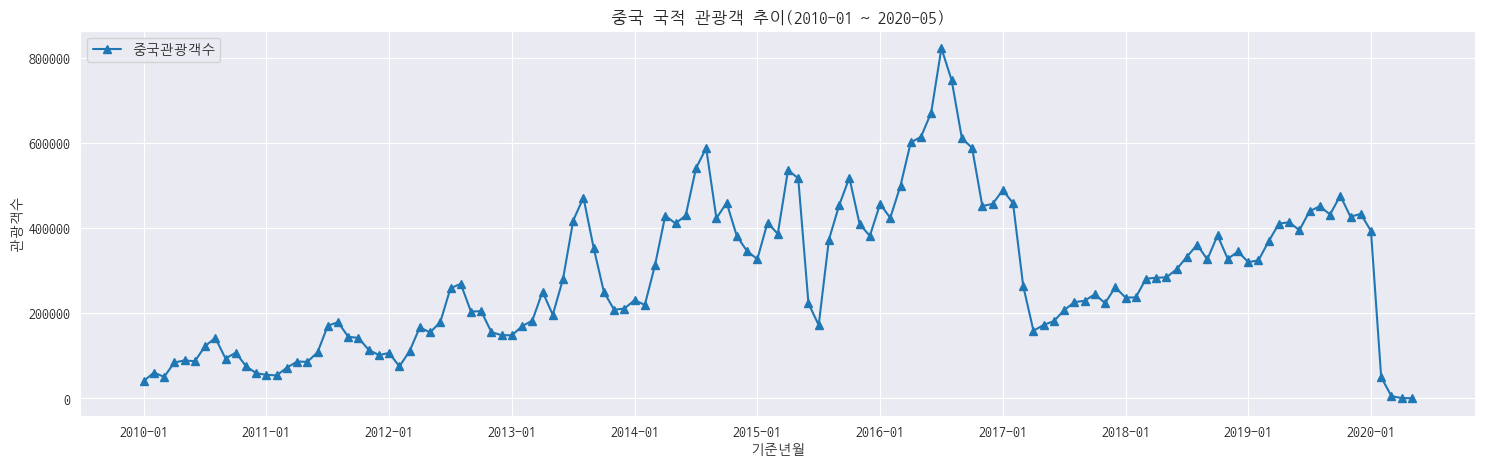

In [22]:
# 중국 관광객 차트
plt.figure(figsize=(18,5)) # w:18 , h:5
plt.plot(df_china['기준년월'], df_china['관광'], label='중국관광객수', marker='^')
plt.title('중국 국적 관광객 추이(2010-01 ~ 2020-05)')
plt.xlabel('기준년월')
plt.ylabel('관광객수')
plt.legend(loc='upper left')
plt.xticks([f'{yyyy}-01' for yyyy in range(2010, 2021)])

plt.show()

##### 관광객 수 TOP5 나라 시각화

In [19]:
countryList = ['중국','일본','대만','미국','홍콩']

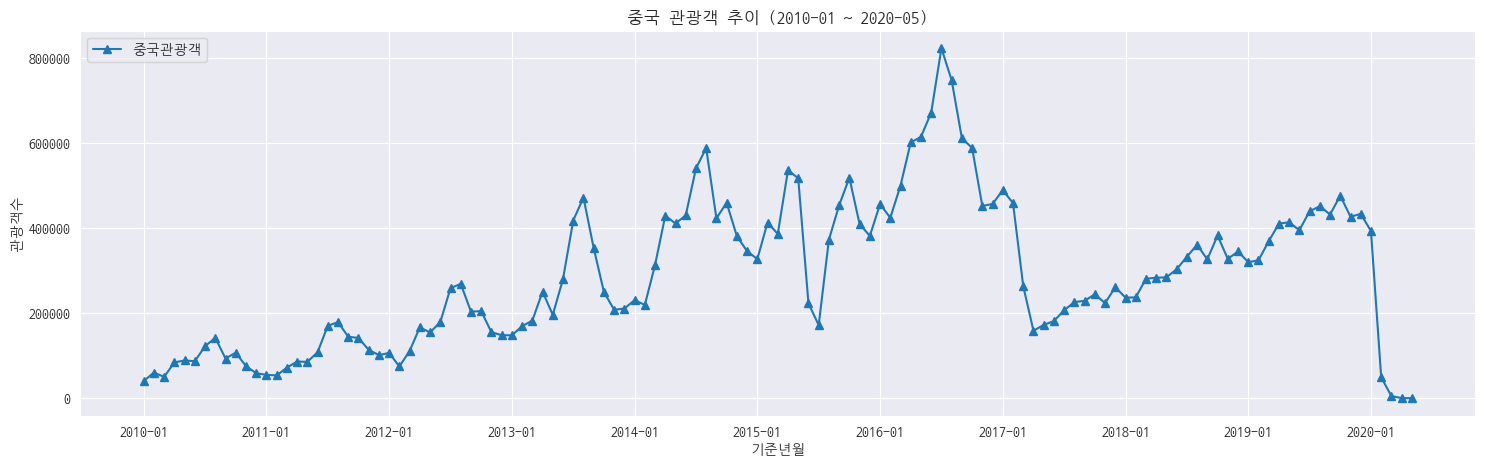

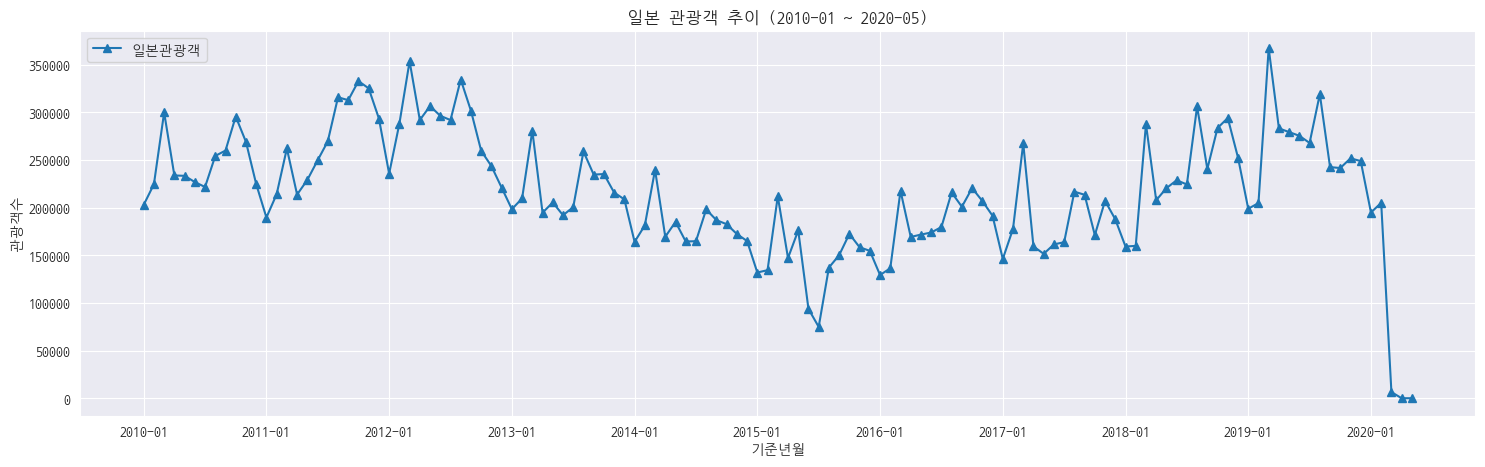

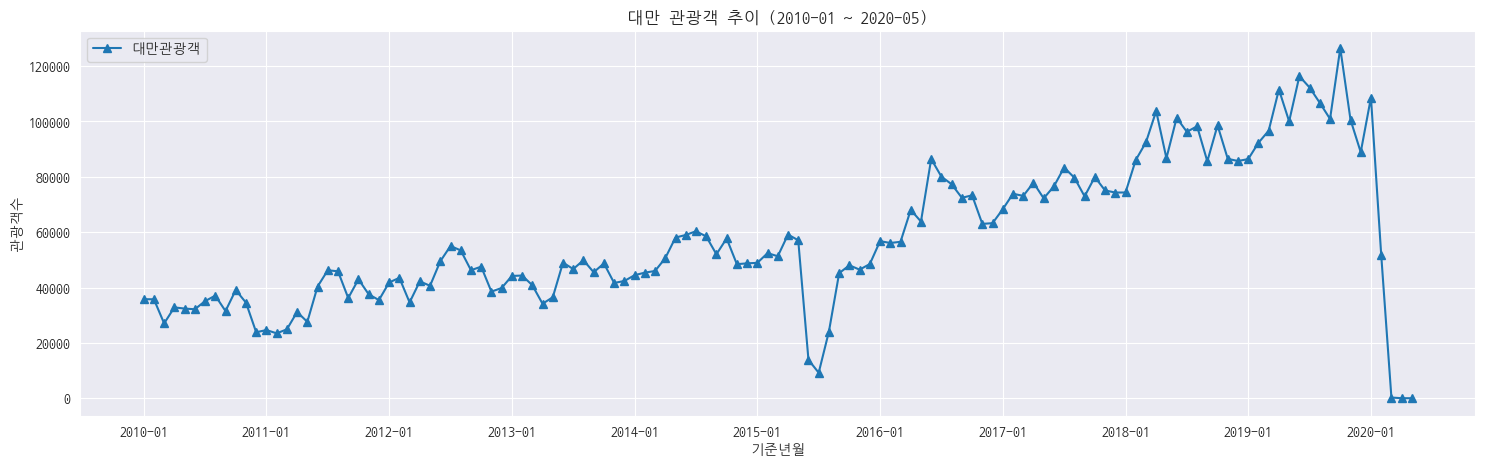

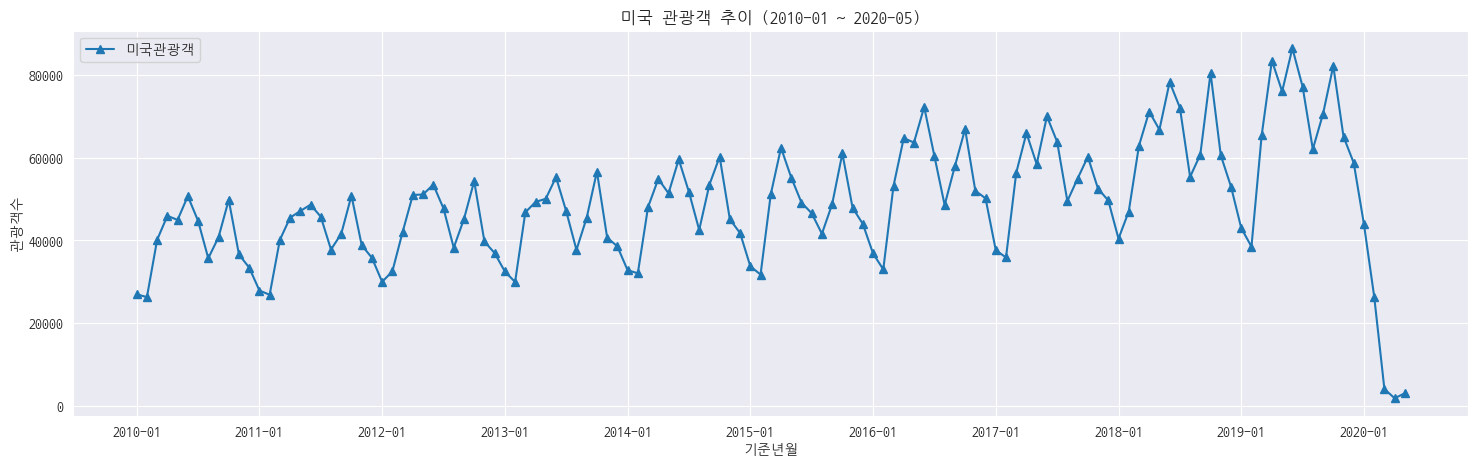

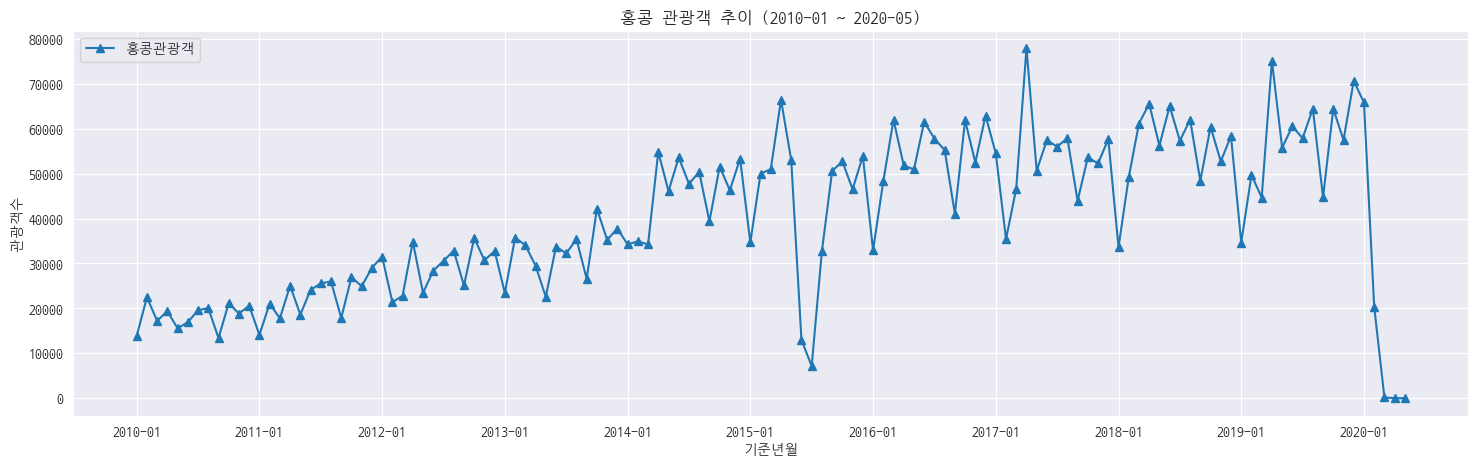

In [23]:
for country in countryList:
    # 나라별 관광객수 필터링
    condition = df_total['국적'] == country
    df_filter = df_total[condition]

    plt.figure(figsize=(18,5))

    plt.plot(df_filter['기준년월'], df_filter['관광'], label= f'{country}관광객', marker='^')
    plt.title(f'{country} 관광객 추이 (2010-01 ~ 2020-05)')
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    plt.legend(loc='upper left')

    plt.xticks([f'{yyyy}-01' for yyyy in range(2010, 2021)])
    plt.show()



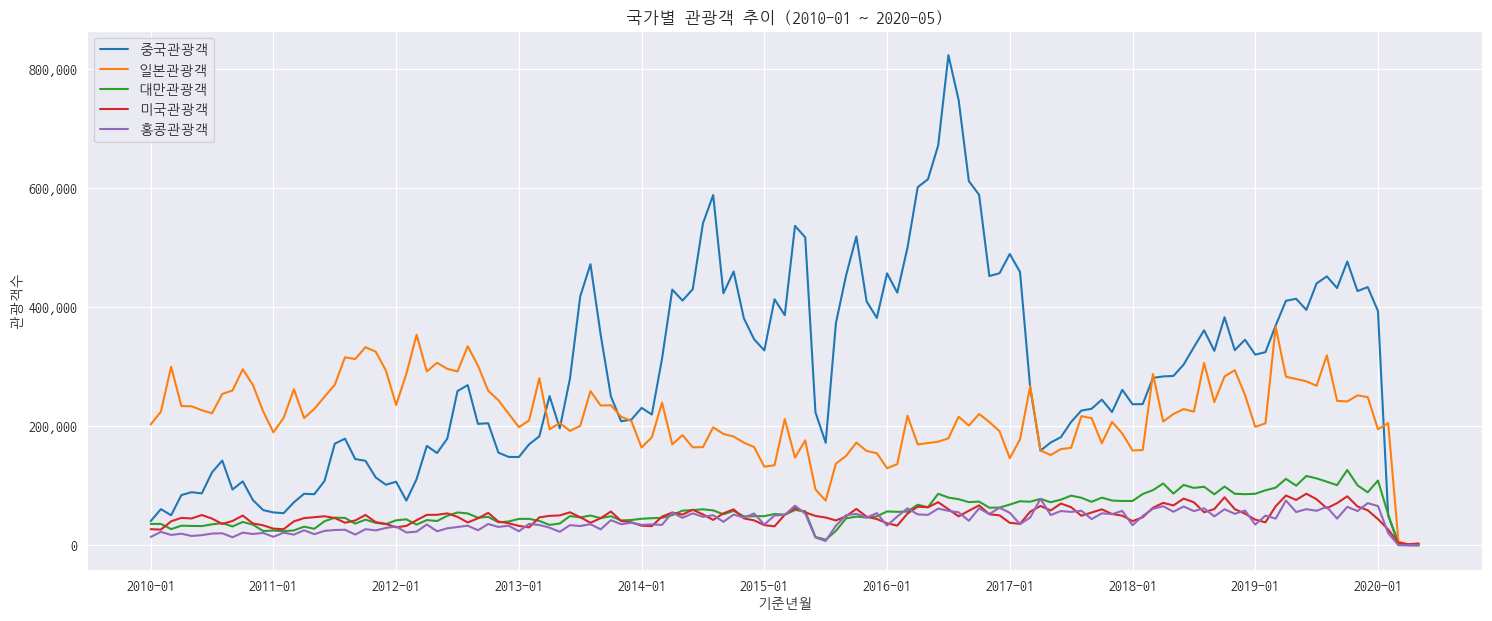

In [27]:
plt.figure(figsize=(18,7))

for country in countryList:
    # 나라별 관광객수 필터링
    condition = df_total['국적'] == country
    df_filter = df_total[condition]

    plt.plot(df_filter['기준년월'], df_filter['관광'], label= f'{country}관광객')
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    plt.legend(loc='upper left')

    plt.xticks([f'{yyyy}-01' for yyyy in range(2010, 2021)])
plt.title(f'TOP5 국가별 관광객 추이 (2010-01 ~ 2020-05)')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{x:,.0f}' for x in current_values])
plt.show()


#### 히트맵

현재 년도와 월을 하나의 컬럼으로 구성, 히트맵 사용시 년도와 월을 분리

In [28]:
df_total

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아주,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아주,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아주,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아주,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아주,3.3
...,...,...,...,...,...,...,...,...,...,...
7495,대양주 기타,1,0,1,0,3,5,2020-05,오세아니아,0.0
7496,남아프리카공화국,1,0,3,0,25,29,2020-05,아프리카,0.0
7497,아프리카 기타,3,1,3,6,118,131,2020-05,아프리카,0.0
7498,국적미상,1,0,0,0,3,4,2020-05,기타대륙,0.0


In [29]:
## 년도, 월 분리 '2010-01' slice(0,4) : 2010 slice(5,7): 01
df_total['년도'] = df_total['기준년월'].str.slice(0,4)
df_total['월'] = df_total['기준년월'].str.slice(5,7)


In [30]:
df_total

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아주,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아주,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아주,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아주,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아주,3.3,2010,01
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,대양주 기타,1,0,1,0,3,5,2020-05,오세아니아,0.0,2020,05
7496,남아프리카공화국,1,0,3,0,25,29,2020-05,아프리카,0.0,2020,05
7497,아프리카 기타,3,1,3,6,118,131,2020-05,아프리카,0.0,2020,05
7498,국적미상,1,0,0,0,3,4,2020-05,기타대륙,0.0,2020,05


In [33]:
# 기존의 df_china에는 년도, 월 컬럼이 없으므로 다시 df_total에서 필터링 새로 할당
condition = df_total['국적'] == '중국'
df_china = df_total[condition]

In [31]:
df_china

,index,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아주,10.1
1,77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아주,13.6
2,137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아주,9.2
3,197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아주,15.5
4,257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아주,17.0
...,...,...,...,...,...,...,...,...,...,...,...
120,7217,중국,393336,2813,99,10433,75000,481681,2020-01,아시아주,38.2
121,7277,중국,49520,715,11,20753,33087,104086,2020-02,아시아주,9.8
122,7337,중국,5040,115,2,7388,4050,16595,2020-03,아시아주,16.0
123,7397,중국,522,71,0,1112,2230,3935,2020-04,아시아주,10.2


In [35]:
## 피벗테이블로 구성
df_chinaPivot = df_china.pivot_table(values='관광',index='년도', columns='월', aggfunc='sum')

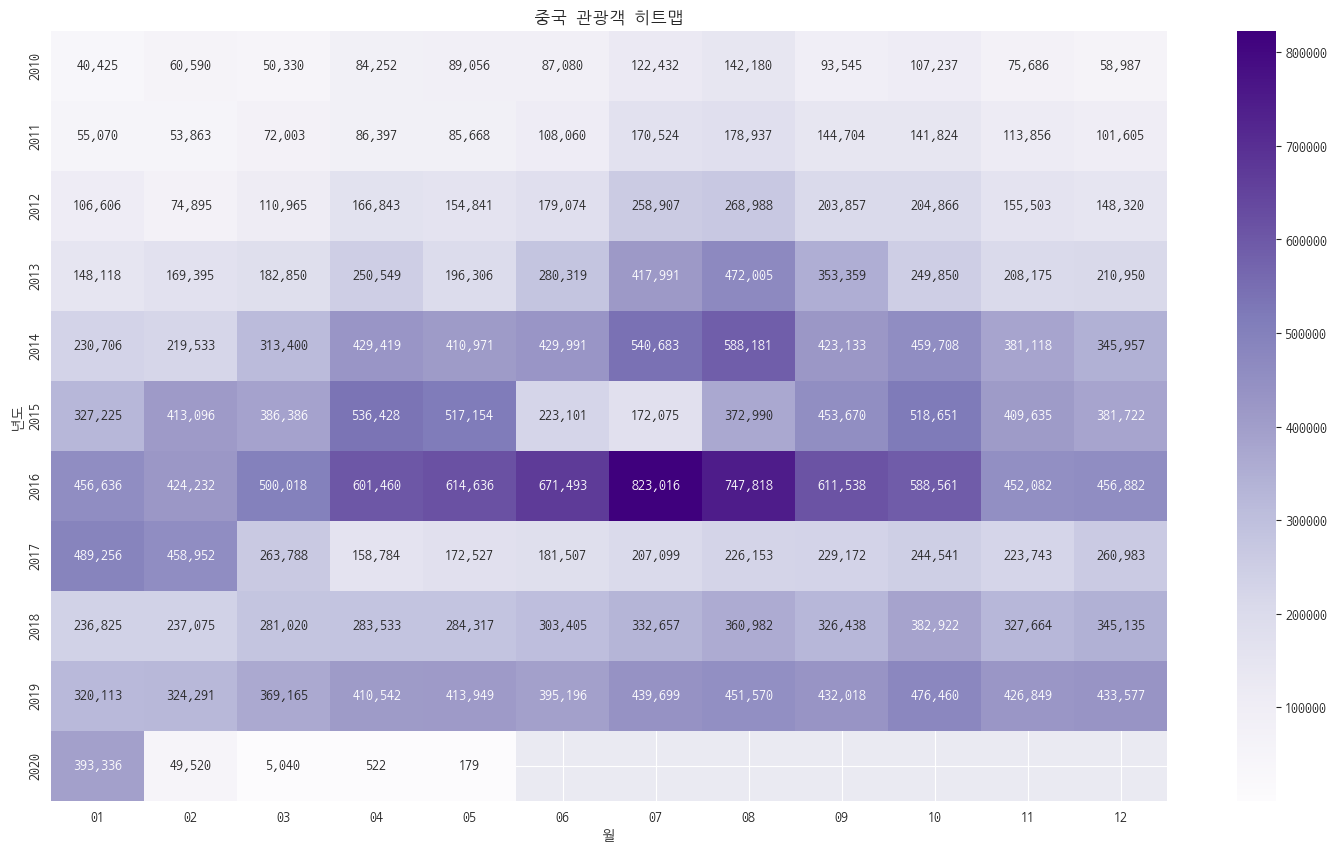

In [43]:
## 히트맵
plt.figure(figsize=(18,10))
# fmt = '.0f' 소수점 삭제
ax = sns.heatmap(df_chinaPivot, annot=True, fmt='.0f', cmap='Purples')
plt.title('중국 관광객 히트맵')

for t in ax.texts:
    t.set_text(f'{int(t.get_text()):,d}') #1000 단위 쉼표

plt.show()

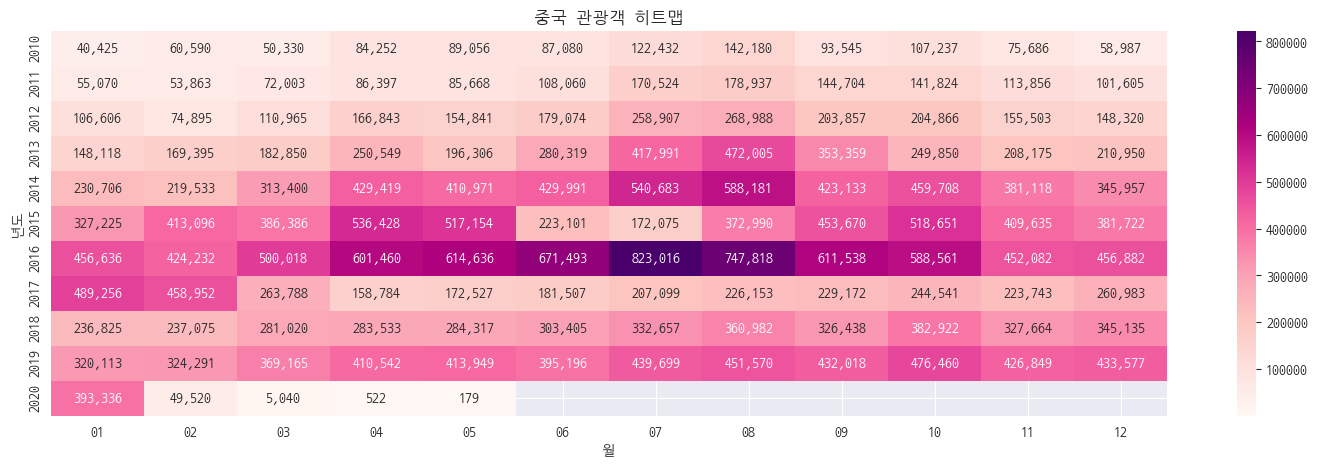

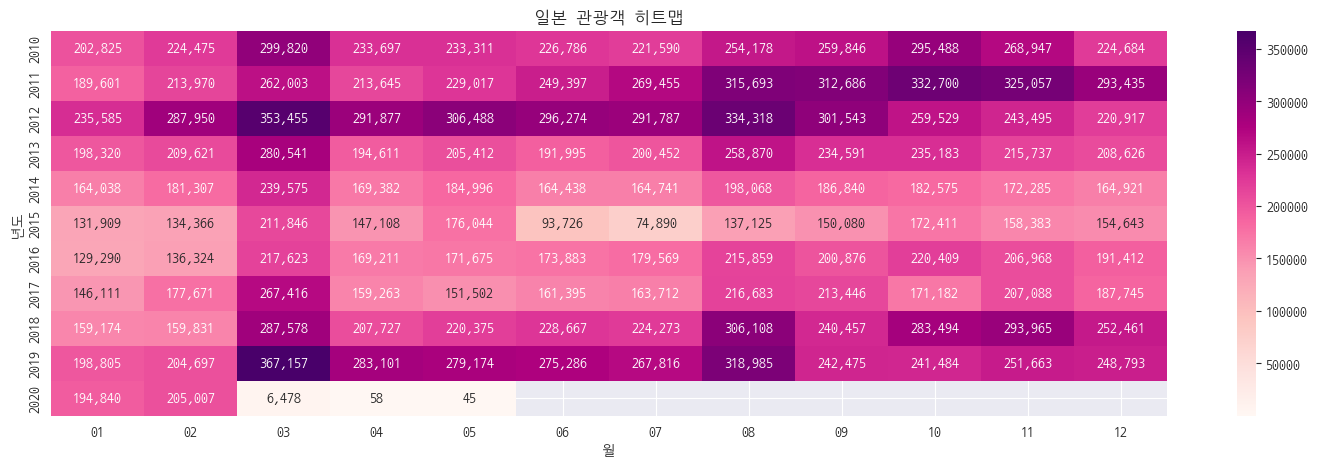

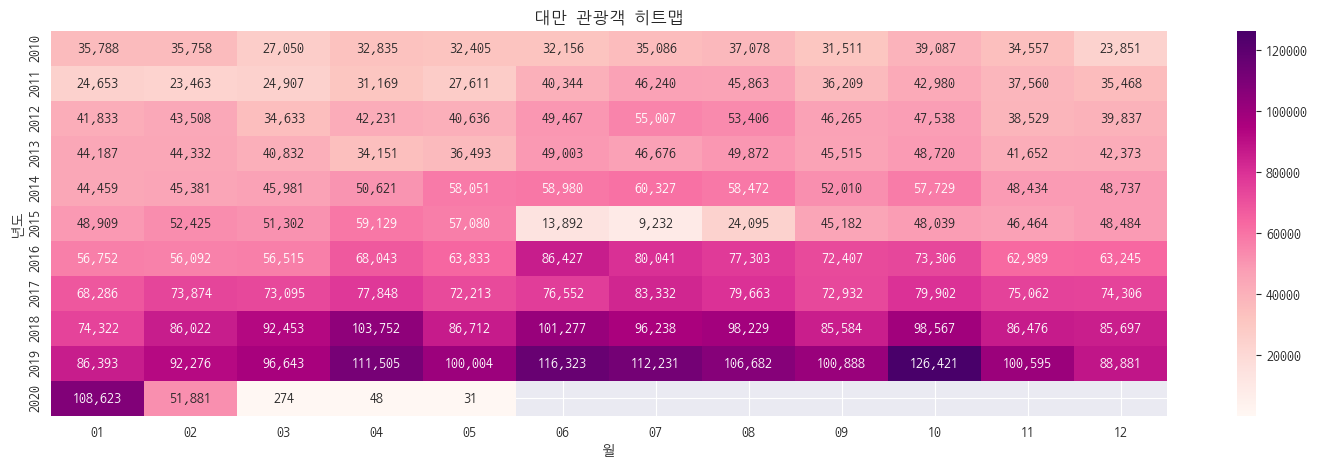

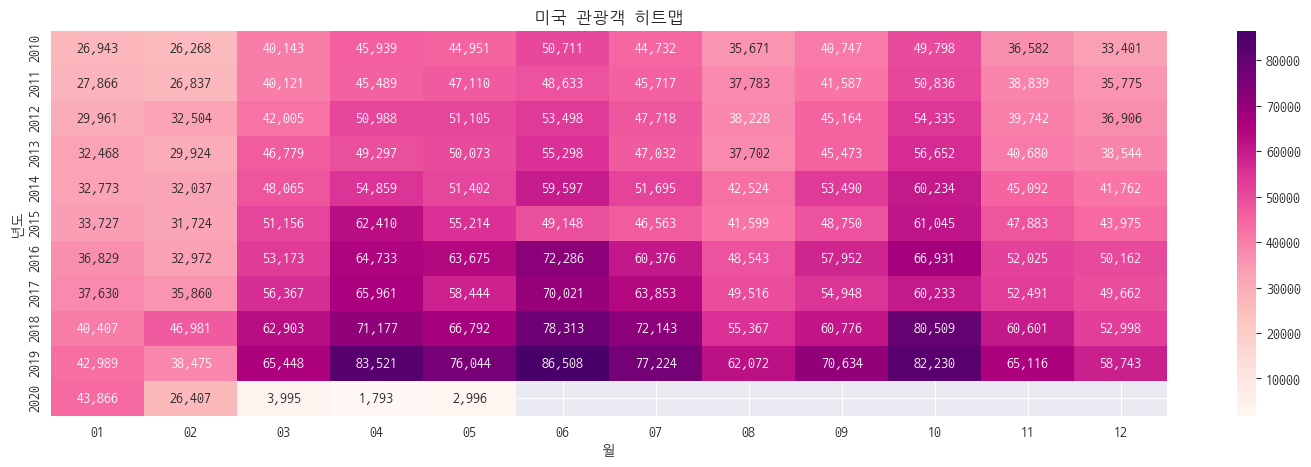

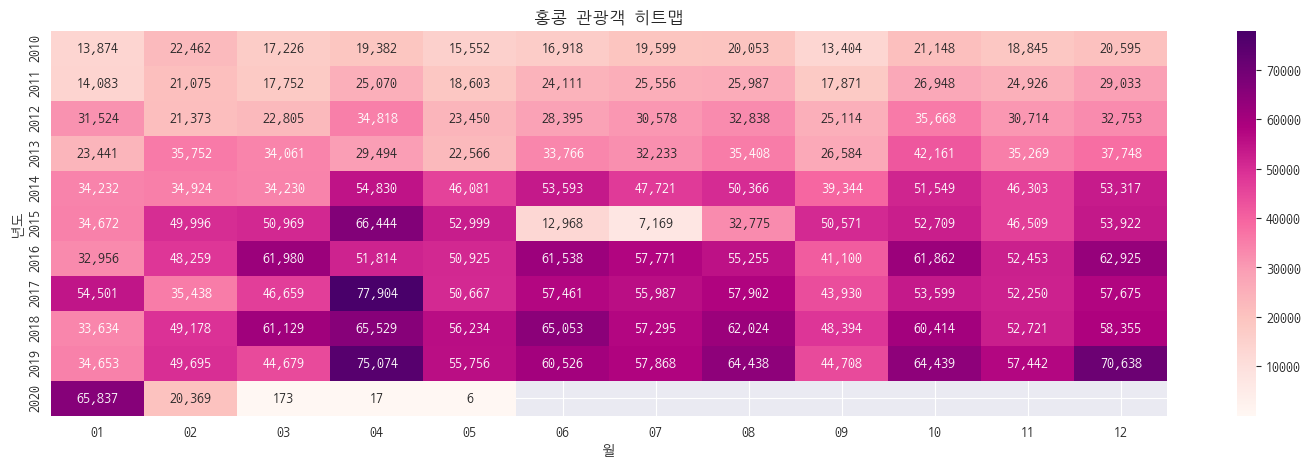

In [53]:
for country in ['중국','일본','대만','미국','홍콩']:
    # 나라별 관광객수 필터링
    condition = df_total['국적'] == country
    df_filter = df_total[condition]
    
    plt.figure(figsize=(18,5))
    df_pivot= df_filter.pivot_table(values='관광',index='년도', columns='월', aggfunc='sum')

    ax = sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='RdPu')
    plt.title(f'{country} 관광객 히트맵')

    for t in ax.texts:
        t.set_text(f'{int(t.get_text()):,d}') #1000 단위 쉼표
    
    plt.show()


##### 시각화 차트 , 히트맵으로 분석

- 2010년 이후로 꾸준히 증가
- 2017년 초에 큰폭으로 감소
- 여름 관광객수가 가장 많음 (2015년 여름은 큰폭으로 감소)
- 2020년초 관광객 수가 0에 수렴

##### 인터넷 검색
1. 2015년 여름 관광객 감소 이유 검색 
    - 메르스 발병으로 인한 관광객 감소, Top5의 미국 외 모든나라에서 동일
2. 2017년 관광객 감소 이유
    - 사드(THAAD) 보복, 사드 배치에 대한 반발로 중국 관광객 급감
3. 2020년 3월 부터의 감소
    - 코로나로 인한 감소, 모든나라가 동일